## Dataset link: https://archive.ics.uci.edu/dataset/222/bank+marketing

In [1]:
#importing required libraries

import pandas as pd
import numpy as np

In [2]:
#reading the dataset

df = pd.read_csv('./bank-additional-full.csv', delimiter = ';')
df.head()



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.shape

(41188, 21)

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## There are zero missing values in the dataset.

In [6]:
df['duration']

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41188, dtype: int64

In [7]:
#dropping duplicates 

df.drop_duplicates()
#df.drop_duplicates(keep = 'first', inplace = True)
print(df.duplicated().sum())
df= df.drop_duplicates()

print(df.shape)



12
(41176, 21)


In [8]:
print(df.nunique().sort_values(ascending=False))

duration          1544
euribor3m          316
age                 78
campaign            42
pdays               27
cons.conf.idx       26
cons.price.idx      26
job                 12
nr.employed         11
month               10
emp.var.rate        10
previous             8
education            8
day_of_week          5
marital              4
default              3
poutcome             3
loan                 3
housing              3
contact              2
y                    2
dtype: int64


In [9]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Duration : Length of the last call (in seconds). Important: This strongly influences whether the client subscribed, but since it's only known after the call, it shouldn't be used in a real predictive model.

In [10]:
##Develop model with Duration and without duration feature and report the performance of the model.
## We exclude duration columns. For building a realistic predictive model, 
df.drop('duration', axis = 1, inplace = True)


In [11]:
#https://www.geeksforgeeks.org/data-science/detect-and-remove-the-outliers-using-python/

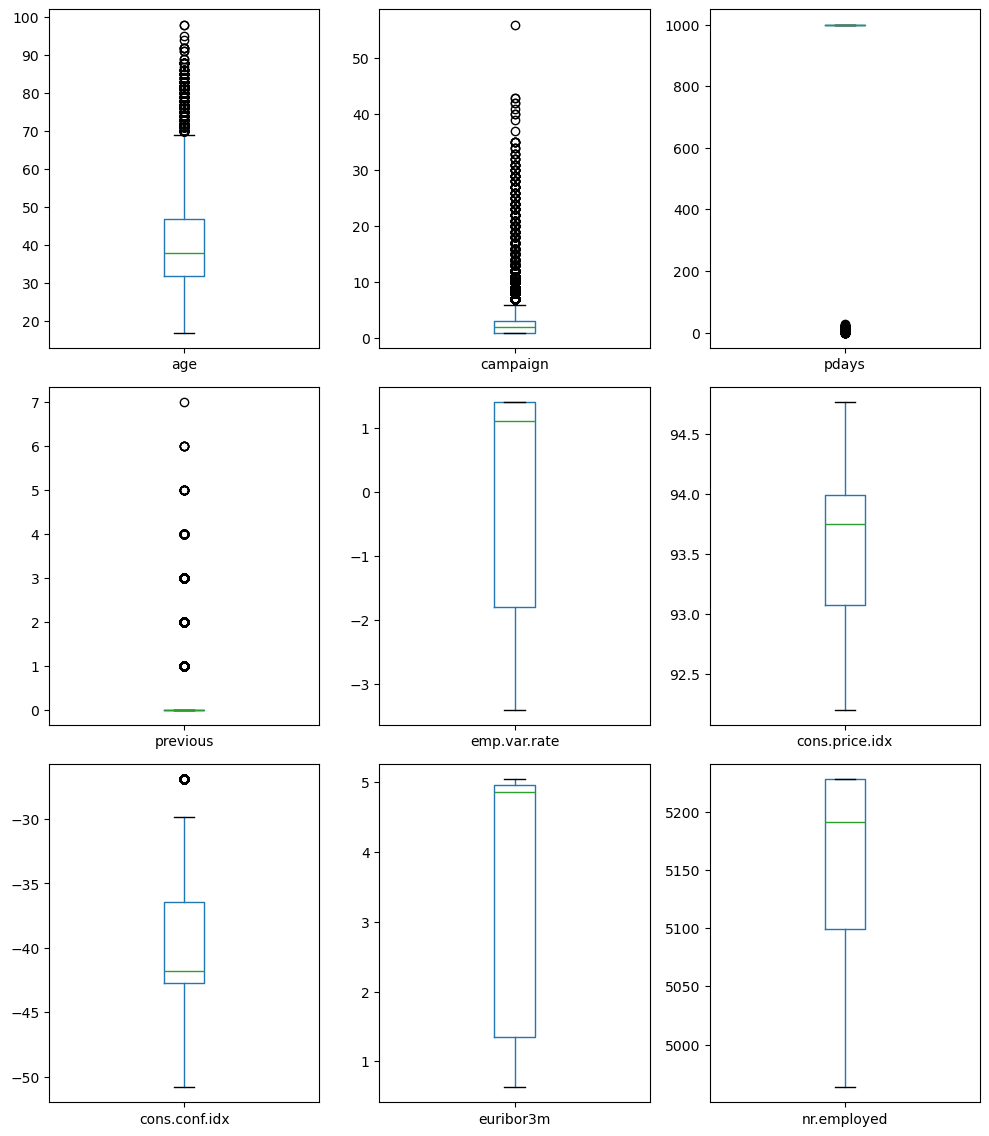

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


#outlier detection
cols = ['age', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

       
plt.figure(figsize=(10,15))

for i, col in enumerate(cols):
    plt.subplot(4,3,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()
plt.savefig("./outlier.png")


| Row       | Meaning                                                                                                |
| --------- | ------------------------------------------------------------------------------------------------------ |
| **count** | Number of **non-null (non-missing)** values in each column. Here, all have 41,176 values, so no nulls. |
| **mean**  | The **average** value of the column. Can be distorted by outliers.                                     |
| **std**   | The **standard deviation**, measuring how spread out the values are. Larger std = more variability.    |
| **min**   | The **minimum** value observed in the column.                                                          |
| **25%**   | The **first quartile (Q1)** — 25% of the data falls **below** this value.                              |
| **50%**   | The **median (Q2)** — 50% of the data falls **below** this value.                                      |
| **75%**   | The **third quartile (Q3)** — 75% of the data falls **below** this value.                              |
| **max**   | The **maximum** value observed — potential outlier if very far from Q3.                                |


In [33]:
#checking statistics of outlier features

df[['age', 'campaign', 'pdays','previous','cons.conf.idx']].describe()



,age,campaign,pdays,previous,cons.conf.idx
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,2.567879,962.464810,0.173013,-40.502863
std,10.42068,2.770318,186.937102,0.494964,4.627860
min,17.00000,1.000000,0.000000,0.000000,-50.800000
25%,32.00000,1.000000,999.000000,0.000000,-42.700000
50%,38.00000,2.000000,999.000000,0.000000,-41.800000
75%,47.00000,3.000000,999.000000,0.000000,-36.400000
max,98.00000,56.000000,999.000000,7.000000,-26.900000


In [14]:
df['pdays'].unique

<bound method Series.unique of 0        999
1        999
2        999
3        999
4        999
        ... 
41183    999
41184    999
41185    999
41186    999
41187    999
Name: pdays, Length: 41176, dtype: int64>

In [15]:
 #contact , pdays, poutcome : missing values

In [16]:
#https://www.geeksforgeeks.org/machine-learning/ml-handling-missing-values/

### Ranges from 17 to 98, with a mean of ~40 years.

### Looks normally distributed; some clients are quite old, but values seem realistic.

In [17]:
np.max(df['age'])

98

In [18]:
#The value which is outside the whisker
print(df['campaign'].quantile(0.95))

7.0


### Outlier removal using median values
### 50%	The median (Q2) — 50% of the data falls below this value. The median of df['campaign'] = 2.000

In [19]:
#replacing the values which are greater than the 95th percentile with the median value
median_val = df['campaign'].median()
threshold1 = df['campaign'].quantile(0.95)
df['campaign_median_capped'] = np.where(df['campaign'] > threshold1, median_val, df['campaign'])
df[['campaign', 'campaign_median_capped']].describe()

,campaign,campaign_median_capped
count,41176.000000,41176.000000
mean,2.567879,2.118127
std,2.770318,1.383215
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,56.000000,7.000000


### Outlier removal using mean values
### The mean of df['campaign'] = 2.567879

In [20]:
#replacing the values which are greater than the 95th percentile with the median value
mean_val = df['campaign'].mean()
threshold2 = df['campaign'].quantile(0.95)
df['campaign_mean_capped'] = np.where(df['campaign'] > threshold2, mean_val, df['campaign'])
df[['campaign', 'campaign_mean_capped']].describe()

,campaign,campaign_mean_capped
count,41176.000000,41176.000000
mean,2.567879,2.142635
std,2.770318,1.385933
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,56.000000,7.000000


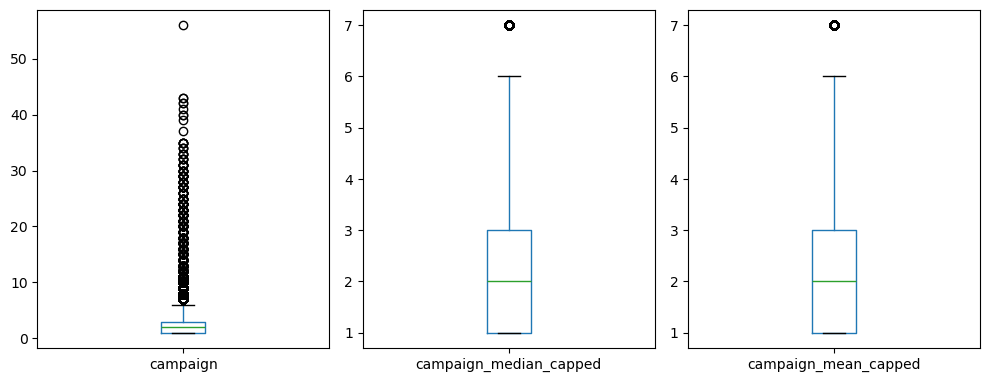

In [21]:

cols = ['campaign','campaign_median_capped','campaign_mean_capped']

plt.figure(figsize=(10,15))

for i, col in enumerate(cols):
    plt.subplot(4,3,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()



### Replace campaign Outliers Within Each Job Group (Using IQR)

In [22]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower, upper)

df['campaign_IQR'] = df.groupby('job')['campaign'].transform(cap_outliers)
df[['campaign','campaign_IQR']].describe()

,campaign,campaign_IQR
count,41176.000000,41176.000000
mean,2.567879,2.275476
std,2.770318,1.550606
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,56.000000,6.000000


Outlier handling is often more robust when done within context, like by job, education, or region.

A 98-year-old student may be an outlier, but an 80-year-old retired person may not.

### Cap campaign using 95th percentile per job group

This:

    Calculates the 95th percentile of age for each job group.

    Caps all values above that threshold within the group.

In [23]:
def cap_age(series):
    cap = series.quantile(0.95)
    return series.apply(lambda x: cap if x > cap else x)

df['campaign_95th_percentile'] = df.groupby('job')['campaign'].transform(cap_age)
df[['campaign','campaign_IQR', 'campaign_95th_percentile']].describe()

,campaign,campaign_IQR,campaign_95th_percentile
count,41176.000000,41176.000000,41176.000000
mean,2.567879,2.275476,2.333495
std,2.770318,1.550606,1.702874
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,3.000000,3.000000,3.000000
max,56.000000,6.000000,8.000000


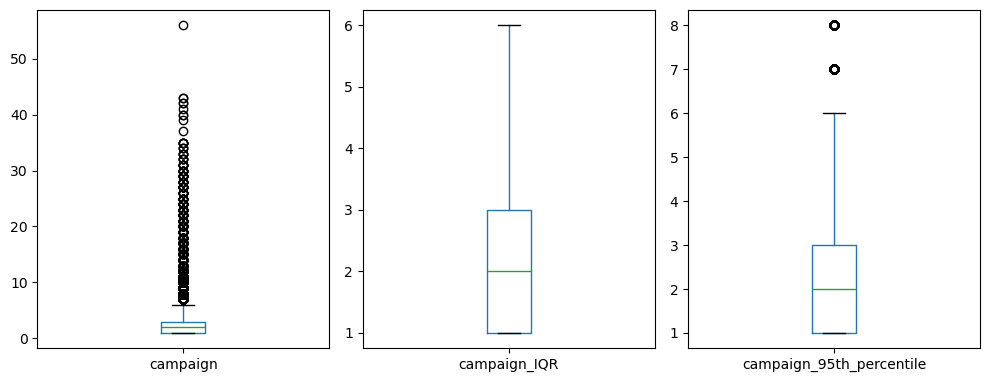

In [24]:
cols = ['campaign','campaign_IQR','campaign_95th_percentile']

plt.figure(figsize=(10,15))

for i, col in enumerate(cols):
    plt.subplot(4,3,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()


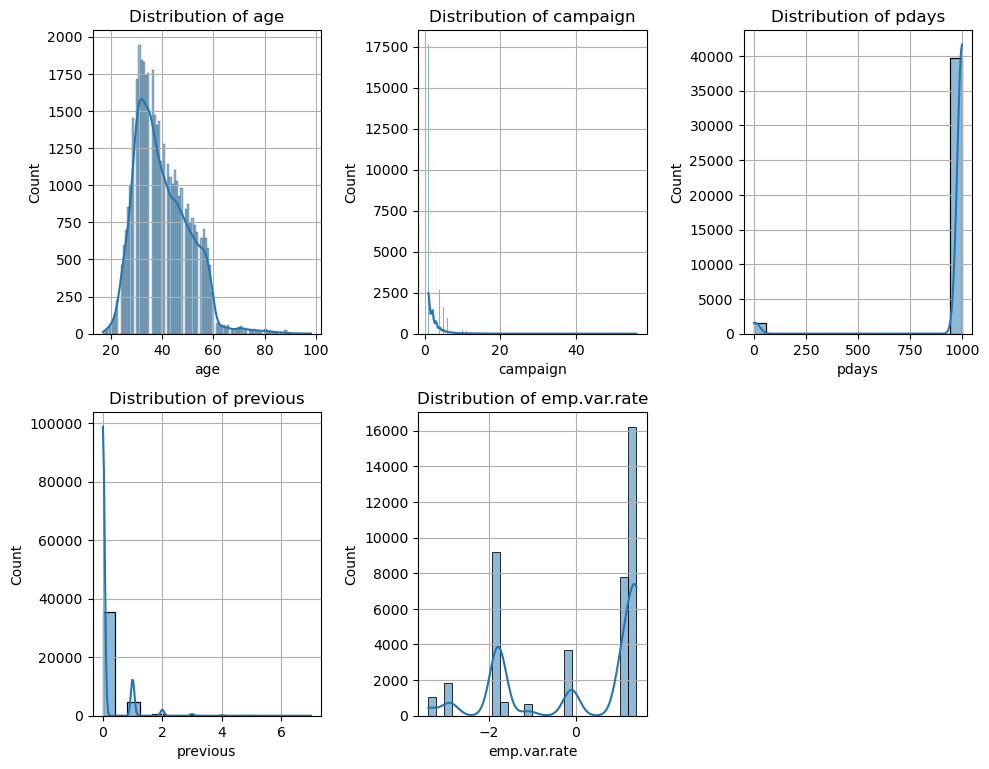

In [25]:
cols = ['age','campaign','pdays','previous','emp.var.rate']

plt.figure(figsize=(10, 15))

for i, col in enumerate(cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], kde=True)  # use df[col] to access column data
    plt.title(f'Distribution of {col}')
    plt.grid(True)

plt.tight_layout()
plt.show()


#sns.histplot(df['campaign'])
#sns.histplot(df['campaign'], bins=20)
#df['campaign'].describe()

### Final Recommendation:
#### Use IQR or 95th percentile to identify outliers
#### Then use median to replace them for robustness

In [34]:

#replacing the values which are greater than the 95th percentile with the median value
median_previous = df['previous'].median()
threshold3 = df['previous'].quantile(0.95)
df['previous_median_capped'] = np.where(df['previous'] > threshold3, median_previous, df['previous'])
df[['previous', 'previous_median_capped']].describe()

,previous,previous_median_capped
count,41176.000000,41176.000000
mean,0.173013,0.110768
std,0.494964,0.313849
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,7.000000,1.000000


In [39]:
#replacing the values which are greater than the 95th percentile with the median value
median_emp_var_rate = df['cons.conf.idx'].median()
threshold4 = df['cons.conf.idx'].quantile(0.95)
df['cons.conf.idx_median_capped'] = np.where(df['cons.conf.idx'] > threshold4, median_emp_var_rate , df['cons.conf.idx'])
df[['cons.conf.idx', 'cons.conf.idx_median_capped']].describe()

,cons.conf.idx,cons.conf.idx_median_capped
count,41176.000000,41176.000000
mean,-40.502863,-41.074747
std,4.627860,3.962589
min,-50.800000,-50.800000
25%,-42.700000,-42.700000
50%,-41.800000,-41.800000
75%,-36.400000,-36.400000
max,-26.900000,-33.600000


In [38]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower, upper)

df['cons.conf.idx_IQR'] = df.groupby('job')['cons.conf.idx'].transform(cap_outliers)
df[['cons.conf.idx','cons.conf.idx_IQR']].describe()

,cons.conf.idx,cons.conf.idx_IQR
count,41176.000000,41176.000000
mean,-40.502863,-40.503288
std,4.627860,4.626520
min,-50.800000,-50.800000
25%,-42.700000,-42.700000
50%,-41.800000,-41.800000
75%,-36.400000,-36.400000
max,-26.900000,-26.900000


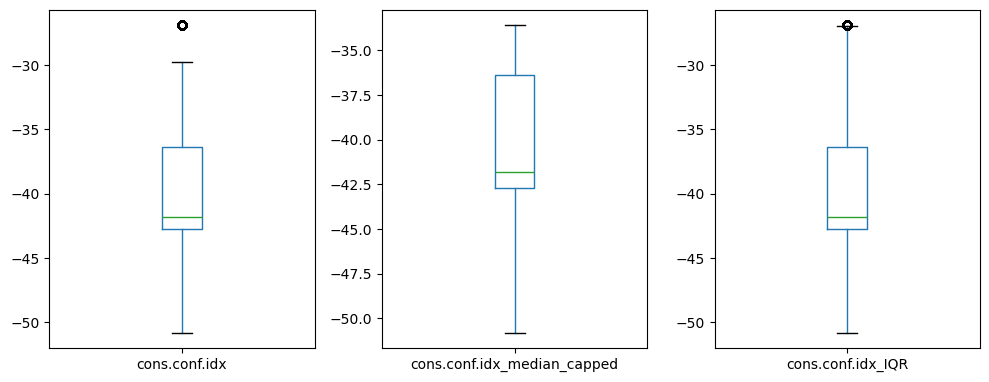

In [40]:
cols = ['cons.conf.idx','cons.conf.idx_median_capped','cons.conf.idx_IQR']

plt.figure(figsize=(10,15))

for i, col in enumerate(cols):
    plt.subplot(4,3,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()
